In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [3]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


## Problema : Explorar o valor do aluguel (rent amount RS)
### Estatística univariada

In [6]:
# Renomeando a coluna
df.rename(columns = {'rent amount (R$)' : 'valor_aluguel'}, inplace = True)

In [7]:
# Calculando a média
df['valor_aluguel'].mean()

3896.247194163861

In [8]:
# Calculando a mediana
df['valor_aluguel'].median()

2661.0

Quando temos uma grande diferença entre a média e a mediana, podemos concluir que temos a presença de outliers.

In [9]:
# Calculando o desvio padrão
df['valor_aluguel'].std()

3408.5455176710816

O valor do desvio padrão é alto, quase o valor da média. Isso quer dizer que temos valores muito dispersos no dataset.

In [10]:
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

Analisando a descrição do dataset, podemos concluir que os outliers estão no Q3. Note que entre Q2 e Q3 há um crescimento de 9x.

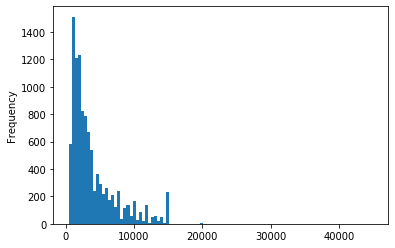

In [11]:
# Usando o histograma para vesualizar a frequancia dos valores no dataset
df['valor_aluguel'].plot(kind = 'hist', bins = 100)

## Exploração Multivariáveis

### Perguntas:
- Qual a cidade com a média de alugel mais alta?
- Quantos banheiros existem nas recidencias com aluguel mais altos?
- Os imovéis mais caros aceitam animal?
- Os imóveis caros são mobiliados?

### Hipóteses:
- São Paulo é a cidade com aluguel mais caro.
- Quanto mais banheiros em um imóvel maior o valor do aluguel.
- Os imóveis com mobilia tem o aluguel mais alto.

In [12]:
# Qual a cidade com a média de alugel mais alta?
df.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending = False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


In [13]:
# Quantos banheiros em média existem nas recidencias com aluguel mais altos?
# Primeiro é importante verificar "O que seria um aluguel alto?", nesse exemplo vamos analisar os imóveis em Q3.
df['aluguel_alto'] = ['Alto' if x > 5000 else 'Baixo' for x in df['valor_aluguel']]
# Criei uma nova coluna para classificar o aluguel como alto ou baixo
df['aluguel_alto'].value_counts()

Baixo    8153
Alto     2539
Name: aluguel_alto, dtype: int64

In [14]:
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

In [15]:
# Vamos verificar a correlação entre o valor do aluguel e a quantidade de banheiros
# Pearson
df[['valor_aluguel', 'bathroom']].corr()

,valor_aluguel,bathroom
valor_aluguel,1.000000,0.668504
bathroom,0.668504,1.000000


Por padrão a correlação é calculada com o método 'pearson', é possível usar o método 'spearman' passando ele como parâmetro, conforme abaixo.

In [16]:
# Spearman
df[['valor_aluguel', 'bathroom']].corr('spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


Analisando a correlação, podemos dizer que é uma correlação forte e afirmar que o valor do aluguel aumenta em função da quantidade de quartos no imóvel.

In [20]:
aux = pd.DataFrame({'colunas' : df.columns, 'tipos' : df.dtypes})
aux

,colunas,tipos
city,city,object
area,area,int64
rooms,rooms,int64
bathroom,bathroom,int64
parking spaces,parking spaces,int64
floor,floor,object
animal,animal,object
furniture,furniture,object
hoa (R$),hoa (R$),int64
valor_aluguel,valor_aluguel,int64


In [22]:
# Criando uma lista que contém todas as váriaveis do tipo int64
lista = list(aux[aux['tipos'] == 'int64']['colunas'])

In [23]:
# Criando um for para percorrer toda a lista com variáveis int64 e verificar a correlação com o valor do aluguel
for coluna in lista:
	print(coluna)
	print(df[['valor_aluguel', coluna]].corr(method = 'spearman'))

area
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000
rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000
bathroom
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000
parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000
hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000
valor_aluguel
               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_aluguel            1.0            1.0
property tax (R$)
                   valor_aluguel  property tax (R$)
valor_aluguel            1.00000            0.65923
property tax (R$)        0.65923            1.00000
fire insurance (R$)
          

## Visualização de dados

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

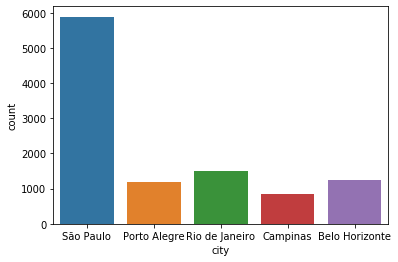

In [25]:
sns.countplot(x= 'city', data = df)

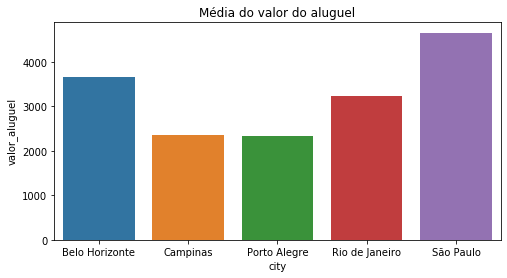

In [37]:
plt.figure(figsize = (8, 4))
sns.barplot(x = 'city', y = 'valor_aluguel', data = df.groupby('city')['valor_aluguel'].mean().reset_index())
plt.title('Média do valor do aluguel')
plt.show()

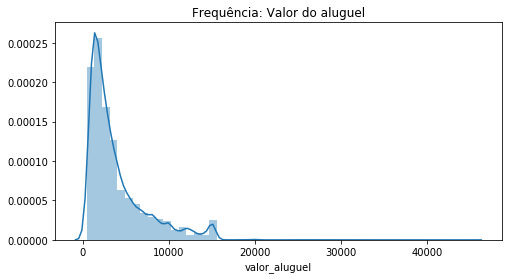

In [40]:
plt.figure(figsize = (8, 4))
sns.distplot(df['valor_aluguel'])
plt.title('Frequência: Valor do aluguel')
plt.show()

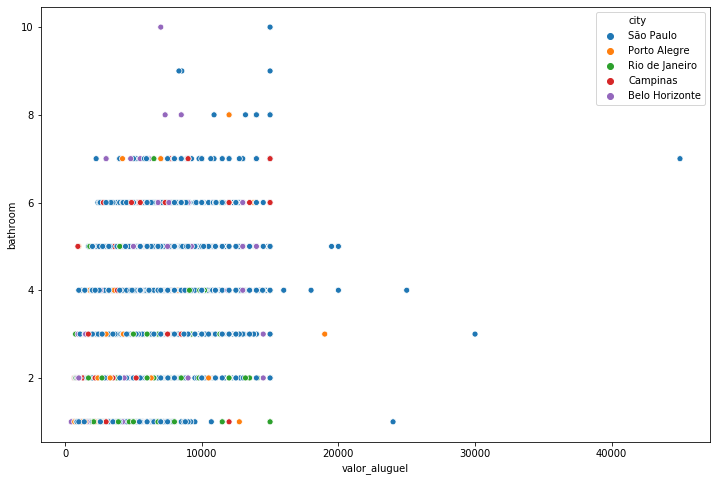

In [42]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'valor_aluguel', y = 'bathroom', hue = 'city', data = df)
plt.show()

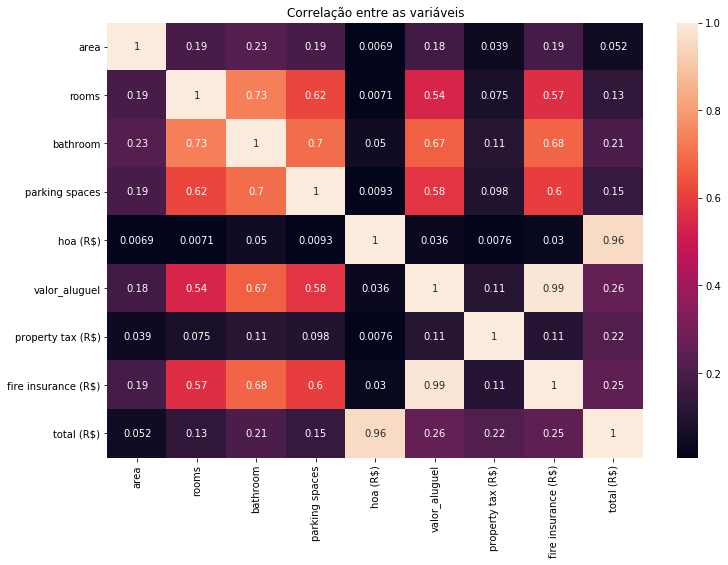

In [43]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlação entre as variáveis')
plt.show()